# Lyapunov

This notebook is for calculating lyapunov exponets for the system.

In [1]:
from modules.helper import *
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

tolerence = 1e-1

# Calculating the Lyapunov Exponents.

Let's start by generating a 4D grid for x, y, a, and $\lambda$.

In [2]:
x = np.arange(-10,10,0.9)
y = np.arange(-10,10,0.9)
l = np.arange(0.5,1,0.05)
a = np.arange(0.5,1,0.05)

n_transient = 1000
n_attractor = 1000

x,y,l,a = np.meshgrid(x,y,l,a)

Now we have our dataset, we want to iterate it over time to get an initial condition which is inside the attractor.

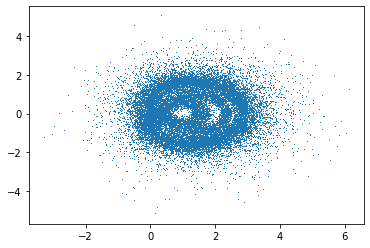

In [3]:
X, Y = repeatmap(x,y,l,a,n=int(n_transient), nosave = True)
plt.plot(X.flatten(), Y.flatten(),',')
plt.show()

Let's iterate this for another 1000 steps to get a representitive sample of the chaotic attractor.

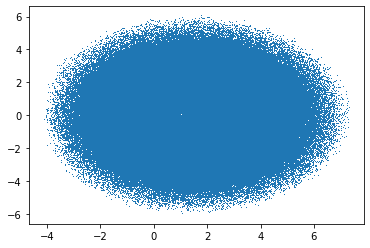

In [4]:
X_attractor,Y_attractor = repeatmap(X,Y,l,a,n=int(n_attractor), nosave = False)
plt.plot(X_attractor.flatten(), Y_attractor.flatten(),',')
plt.show()

Selecting a random angle ($\phi$) between 0 and $2\pi$, we use this as an initial displacement vector for the first timestep of the sequence in each attractor.

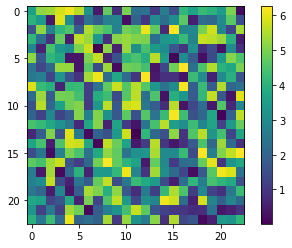

In [5]:
phi = np.random.uniform(0,2*np.pi,(X_attractor.shape[1],X_attractor.shape[2]))
plt.imshow(phi)
plt.colorbar()
plt.show()

In [6]:
E = np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
J = jacobian(X_attractor,Y_attractor,l,a)
print(J.shape, E.shape)

(1000, 23, 23, 10, 10, 2, 2) (2, 2, 23, 23)


In [11]:
first_exponent = np.zeros([n_attractor, *phi.shape])
sum_of_1_and_2 = np.zeros([n_attractor, *phi.shape])

first_exponent[0] = np.linalg.norm(E[0], axis = 0)
print(J.shape, E.shape)

np.einsum('xylaij,ijxy->xyla',J[0], E)

(1000, 23, 23, 10, 10, 2, 2) (2, 2, 23, 23)


(23, 23, 10, 10)

In [8]:
# % Setting the first error at an arbitrarily chosen angle
# phi = pi/3;
# A = [cos(phi),-sin(phi);sin(phi),cos(phi)];
# E = A;
# d1 = norm(E(1,:));
# ac1 = 0;
# ac2 = 0;
# E = GrammSnorm(E);

# % Itterating the point and the error to calculate the largest Lyapunov.
# for i=1:n
#     ac1 = ac1+log(d1);
#     E = jacobi(x(i),y(i),lambda,a)*E;
#     d2 = det(E);
#     d1 = norm(E(:,1));
#     ac2 = ac2 + real(log(d2));
#     E = GrammSnorm(E);
# end
# Ln1 = ac1/n;
# Ln2 = ac2/n;
# toc